Мы проводим A/B-тест, чтобы оценить, влияет ли тема оформления на привлекательность сайта для пользователя. Гипотеза заключается в том, что тёмная тема более привлекательна для посетителей, поэтому их сильнее заинтересует наш сайт, следовательно, они проведут на нём больше времени. Уровень значимости равен 0.05.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


Для начала сравним среднее время в группах на глаз. Рассчитаем среднее и медианное время в каждой группе:

In [4]:
time_data[['time(A)', 'time(B)']].agg(['mean', 'median'])

,time(A),time(B)
mean,492.90,595.406667
median,482.25,600.400000


По предварительным подсчётам, среднее время, проводимое на сайте, в группе B выше, чем в группе A. Однако делать выводы ещё рано — необходимо определить статистическую значимость полученных результатов.

Затем построим гистограмму времени, которое провели на сайте пользователи в каждой из групп:

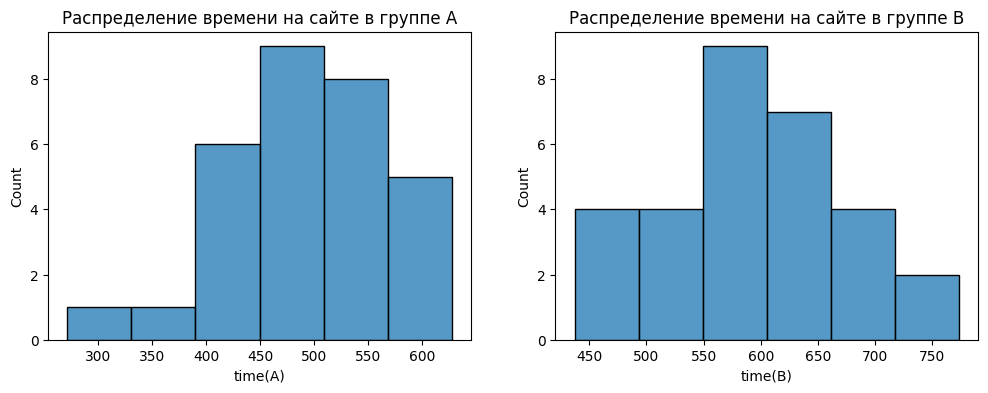

In [5]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

Гистограммы напоминают нормальное распределение. Давайте проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро — Уилка. Для этого используем функцию shapiro() из модуля scipy.stats:

In [6]:
from scipy.stats import shapiro

Зададим уровень значимости  и проверим гипотезу о нормальности каждого из распределений (нулевая гипотеза — распределение нормальное, альтернативная — распределение отлично от нормального):

In [7]:
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределение в группе А является нормальным
# Принимаем нулевую гипотезу. Распределение в группе B является нормальным

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределение в группе А является нормальным
Принимаем нулевую гипотезу. Распределение в группе B является нормальным


Итак, распределение в обеих группах нормальное, а значит, мы можем воспользоваться T-тестом, чтобы сравнить среднее время посещения сайта в группах.

Напомним формулировки статистических гипотез для T-теста:

Нулевая гипотеза (об отсутствии эффекта): среднее время, которое проводят на сайте пользователи из группы А, равно среднему времени, которое проводят на сайте пользователи из группы B:

Альтернативная гипотеза (о наличии эффекта): среднее время, которое проводят на сайте пользователи из группы А, отличается от среднего времени, которое проводят на сайте пользователи из группы B:

Примечание. Ещё раз обратите внимание на то, что именно альтернативная гипотеза отвечает на бизнес-вопрос «Увеличилось ли время, которое пользователь проводит на сайте, после внедрения варианта B?».

Применим двухвыборочный T-тест для сравнения средних — функцию ttest_ind() из модуля scipy.stats.

In [8]:
from scipy.stats import ttest_ind

Функция принимает на вход следующие параметры:

a и b — выборки, соответствующие каждой из групп.
alternative — вид альтернативной гипотезы (‘two-sided’ — двусторонняя, 'less' — левосторонняя, 'greater’ — правосторонняя). По умолчанию используется двусторонняя гипотеза.

In [9]:
alpha = 0.05 #уровень значимости
# вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value: 0.0
# Отвергаем нулевую гипотезу в пользу альтернативной

p-value: 0.0
Отвергаем нулевую гипотезу в пользу альтернативной


# Непараметрические тесты

Мы проводим A/B-тест, чтобы оценить, влияет ли наличие рекомендательной системы сопутствующих товаров на средний чек покупки. Гипотеза заключается в том, что рекомендательная система мотивирует пользователей, помимо основных товаров, добавлять в покупку сопутствующие, тем самым повышая средний чек. Уровень значимости равен 0.05.

In [10]:
check_data = pd.read_excel('data/check_data.xlsx')
check_data.head()

,date,mean_check_a,mean_check_b
0,2020-11-06,68701.239649,88665.123322
1,2020-11-07,26136.309375,46230.394893
2,2020-11-08,119470.770656,139356.451490
3,2020-11-09,71110.880188,90867.073191
4,2020-11-10,85896.024022,105977.473589


В данных содержится информация о значениях ежедневного среднего чека в группах A и B. Период проведения A/B-тестирования — 18 дней.

Сначала сравним среднее время в группах на глаз. Рассчитаем среднее и медианное время в каждой группе:

In [11]:
check_data[['mean_check_a', 'mean_check_b']].agg(['mean', 'median'])

,mean_check_a,mean_check_b
mean,76684.763071,96658.897304
median,62883.707793,82854.201467


По предварительным подсчётам, ежедневный средний чек в группе B выше, чем в группе A. Однако делать выводы ещё рано — необходимо определить статистическую значимость полученных результатов.

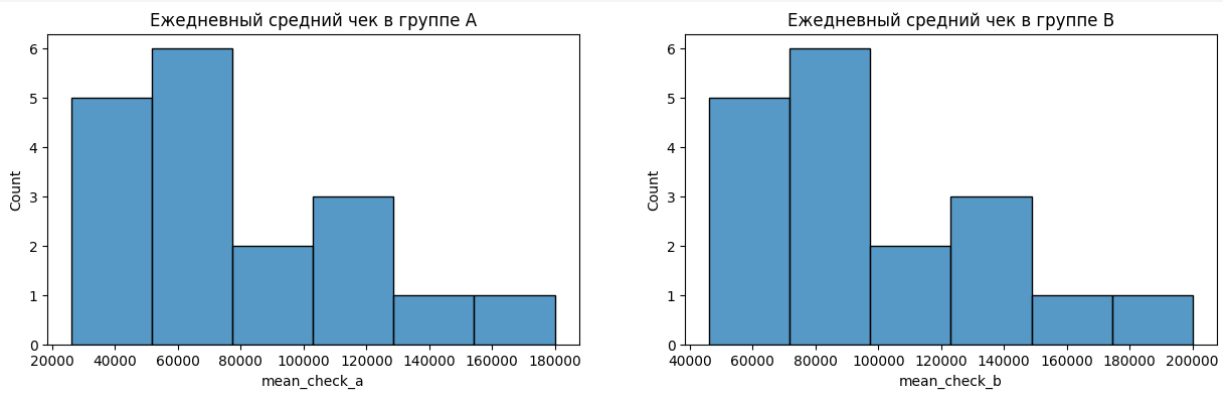

Итак, поскольку данные не распределены нормально, для сравнения истинных средних чеков T-тест уже нё подойдет. Здесь нам придётся обратиться к непараметрическим тестам, например, к критерию Манна — Уитни (U-тест), критерию Колмогорова — Смирнова и другим. Напомним, что эта категория тестов применяется в случаях, когда нет информации о распределении.

Напомним, что U-тест Манна — Уитни реализован в функции mannwhitneyu() из модуля scipy.stats.

In [12]:
from scipy.stats import mannwhitneyu

Функция принимает на вход следующие параметры:

x и y — выборки, соответствующие каждой из групп.
alternative — вид альтернативной гипотезы (‘two-sided’ — двусторонняя, 'less' — левосторонняя, 'greater’ — правосторонняя). По умолчанию используется двусторонняя гипотеза.

In [13]:
alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=check_data['mean_check_a'],
    y=check_data['mean_check_b'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value: 0.06
# У нас нет оснований отвергнуть нулевую гипотезу

p-value: 0.06
У нас нет оснований отвергнуть нулевую гипотезу


Итак, согласно результатам тестирования, p-value = 0.06, что больше, чем уровень значимости . Значит, у нас нет оснований отвергнуть нулевую гипотезу.

Однако нас должно насторожить, что p-value очень близко к уровню значимости. Поэтому давайте дополнительно проведём односторонний U-тест со следующими гипотезами:

Нулевая гипотеза (об отсутствии эффекта): распределение, лежащее в основе среднего чека в группе А, статистически больше либо равно распределению, лежащему в основе среднего чека в группе B:

Левосторонняя альтернативная гипотеза (о наличии эффекта): распределение, лежащее в основе среднего чека в группе А, статистически меньше распределения, лежащего в основе среднего чека в группе B:

In [14]:
alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=check_data['mean_check_a'],
    y=check_data['mean_check_b'],
    alternative='less' # изменили альтернативную гипотезу
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value: 0.03
# Отвергаем нулевую гипотезу в пользу альтернативной

p-value: 0.03
Отвергаем нулевую гипотезу в пользу альтернативной
